In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

mmlu_entropy_df = pd.read_parquet("../../../data/out/cot_entropy/mmlu_phi4mini.parquet")

In [2]:
mmlu_entropy_df.head()

,src,answer,options,category,question,cot_content,question_id,answer_index,total_tokens,meta_cluster,base_cluster,phi3_ans_correct,phi3_entropies,phi3_every_token_info,phi3_ans_token_index,phi3_response,phi3_input_embeddings,phi3_think_embeddings,phi3_answer_embeddings
0,ori_mmlu-jurisprudence,C,['There is no distinction between the two form...,law,Which of the following criticisms of Llewellyn...,NaN,1286,2,81,Legal Interpretation,Legal Theory Interpretations,True,"[0.8887168169021606, 1.6030447483062744, 0.143...","[[{""token_idx"": 12, ""token_prob"": 1.2961473657...",361,"To answer this question, let's first understan...","{""min"": [-1.7109375, -1.4453125, -0.97265625, ...","{""min"": [-1.7421875, -1.609375, -0.7421875, -1...","{""min"": [0.1708984375, -0.94921875, 0.34960937..."
1,ori_mmlu-international_law,E,"['Article 19', 'Article 11', 'Article 12', 'Ar...",law,Which of the following articles are not qualif...,NaN,1293,4,38,Legal Interpretation,Constitutional Law,True,"[0.5754676461219788, 0.5695227384567261, 0.025...","[[{""token_idx"": 1, ""token_prob"": 1.48891549542...",319,To determine which of the given articles are n...,"{""min"": [-1.359375, -1.765625, -0.55859375, -1...","{""min"": [-2.0625, -1.6953125, -0.7421875, -1.3...","{""min"": [0.1123046875, -0.921875, 0.5234375, 1..."
2,ori_mmlu-management,D,"['Work delegation', 'Workload balancing', 'Wor...",business,As what is ensuring that one individual does n...,NaN,83,3,49,Economics & Finance MCQs,Business & Marketing Queries,False,"[1.203656554222107, 1.445164442062378, 0.14232...","[[{""token_idx"": 1, ""token_prob"": 1.53181808855...",347,"To answer this question, let's analyze each op...","{""min"": [-1.5625, -1.828125, -0.53515625, -1.1...","{""min"": [-1.953125, -1.578125, -0.349609375, -...","{""min"": [0.130859375, -0.953125, 0.306640625, ..."
3,stemez-Business,J,"['$308.25', '$142.75', '$199.99', '$225.85', '...",business,Margaret Denault recently rented a truck to dr...,NaN,94,9,118,Economics & Finance MCQs,Business Finance Questions,False,"[0.6496801376342773, 1.174181342124939, 0.0581...","[[{""token_idx"": 16, ""token_prob"": 0.0012652330...",316,"To find the total cost of the rental, we need ...","{""min"": [-1.59375, -1.6015625, -0.36328125, -0...","{""min"": [-2.140625, -2.234375, -0.9921875, -2....","{""min"": [0.08251953125, -0.859375, 0.36328125,..."
4,stemez-Business,I,"['$60,000', '$43,200', '$1,794', '$25,000', '$...",business,The tax rate in the town of Centerville is 11(...,NaN,104,8,102,Economics & Finance MCQs,Business Finance Questions,True,"[0.9100953340530396, 1.2733248472213745, 0.026...","[[{""token_idx"": 16, ""token_prob"": 0.0039558755...",154,To find the expected market value of the prope...,"{""min"": [-1.5, -1.4453125, -0.578125, -0.85156...","{""min"": [-2.0625, -2.125, -0.8203125, -1.125, ...","{""min"": [0.06640625, -1.015625, 0.44140625, 1...."


In [3]:
mmlu_entropy_df.value_counts("phi3_ans_token_index", dropna=False)

phi3_ans_token_index
-1      1336
 315      45
 319      40
 363      40
 365      40
        ... 
 835       1
 79        1
 837       1
 838       1
 87        1
Name: count, Length: 863, dtype: int64

In [4]:
# Filter out unanswered questions (phi3_ans_token_index == -1)

mmlu_entropy_df_filtered = mmlu_entropy_df[mmlu_entropy_df["phi3_ans_token_index"] != -1]

print(f"Len = {len(mmlu_entropy_df)} before filtering and {len(mmlu_entropy_df_filtered)} after filtering")

Len = 12032 before filtering and 10696 after filtering


In [5]:
from transformers import AutoTokenizer

from reasoning_fine_tune.utils.processing import extract_cot_answer_entropy_from_row, extract_cot_answer_from_row

MODEL_NAME = "microsoft/Phi-4-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

mmlu_entropy_df_filtered["phi3_answer"] = mmlu_entropy_df_filtered.apply(
    lambda row: extract_cot_answer_from_row(tokenizer, row, "phi3_every_token_info", "phi3_ans_token_index"), axis=1
)
mmlu_entropy_df_filtered["phi3_answer_entropy"] = mmlu_entropy_df_filtered.apply(
    lambda row: extract_cot_answer_entropy_from_row(row, "phi3_entropies", "phi3_ans_token_index"), axis=1
)

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_71512/782370464.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_entropy_df_filtered["phi3_answer"] = mmlu_entropy_df_filtered.apply(
/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_71512/782370464.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_entropy_df_filtered["phi3_answer_entropy"] = mmlu_entropy_df_filtered.apply(


In [6]:
# Filter out incorrectly formatted answers (answer token is not one of the options)
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

print(mmlu_entropy_df_filtered.value_counts("phi3_answer", dropna=False))

mmlu_entropy_df_filtered = keep_only_valid_and_known_answers(mmlu_entropy_df_filtered, "phi3_answer")

print(mmlu_entropy_df_filtered.value_counts("phi3_answer", dropna=False))

phi3_answer
1         3001
2         1068
3          958
4          951
6          822
7          769
8          718
5          583
9          572
10         548
0          500
number     149
none        10
None         9
34           2
16           2
13           2
45           2
256          2
96           1
95           1
90           1
144          1
85           1
11           1
126          1
656          1
608          1
T            1
52           1
108          1
18           1
21           1
428          1
40           1
36           1
35           1
17           1
31           1
176          1
280          1
28           1
26           1
254          1
25           1
24           1
432          1
Name: count, dtype: int64
phi3_answer
1     3001
2     1068
3      958
4      951
6      822
7      769
8      718
5      583
9      572
10     548
13       2
16       2
11       1
17       1
18       1
Name: count, dtype: int64


In [7]:
print(mmlu_entropy_df_filtered.value_counts("phi3_answer_entropy", dropna=False))

phi3_answer_entropy
0.791383    2
1.007879    2
0.208314    2
0.009034    2
0.029874    2
           ..
0.263278    1
0.263394    1
0.263866    1
0.264032    1
2.851695    1
Name: count, Length: 9863, dtype: int64


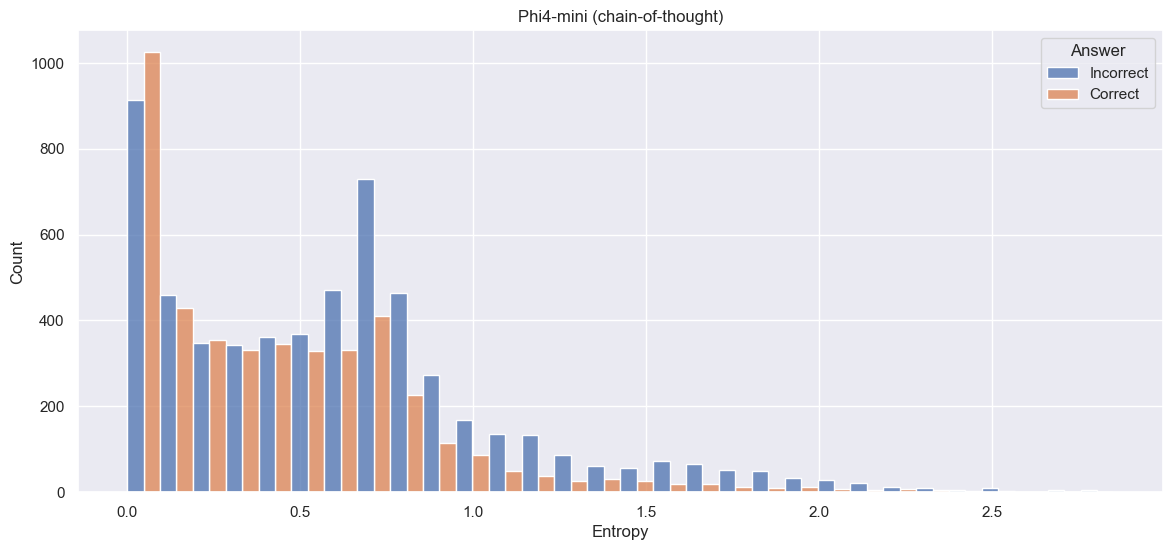

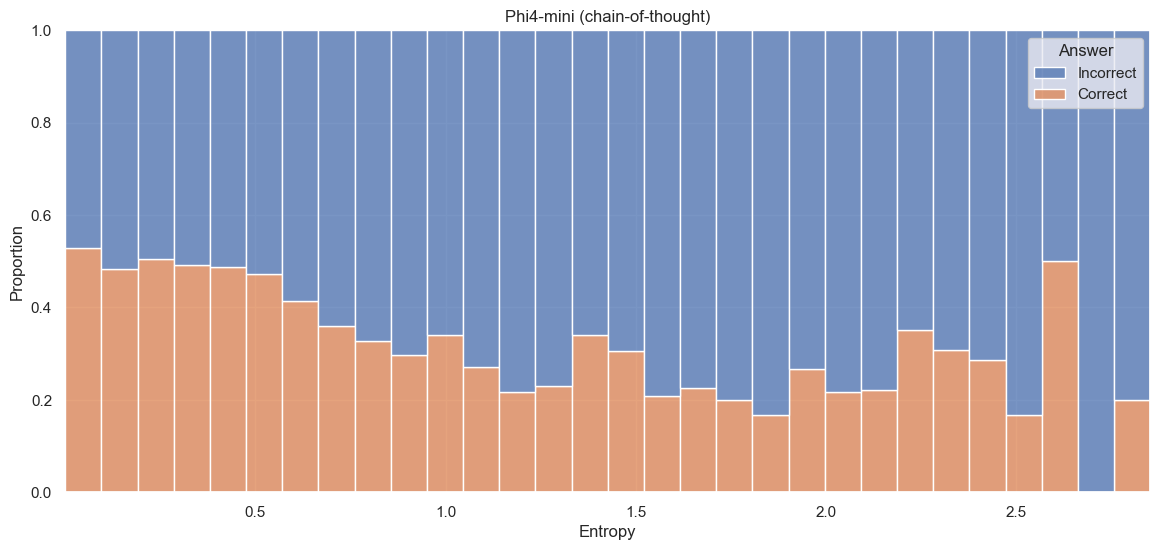

In [8]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(
    mmlu_entropy_df_filtered, "phi3_answer_entropy", "phi3_ans_correct", model_name="Phi4-mini (chain-of-thought)"
)

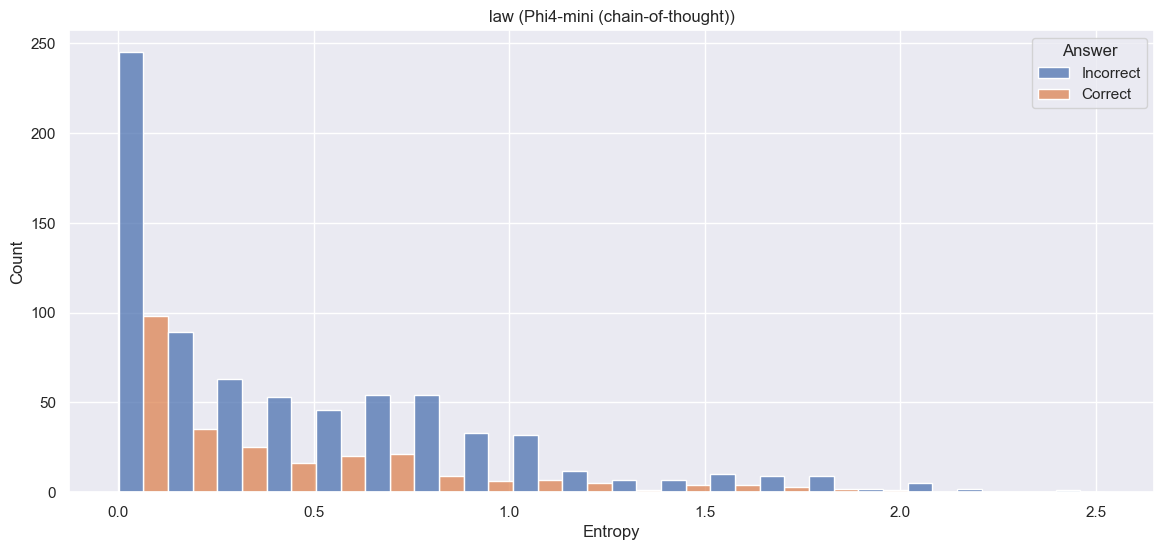

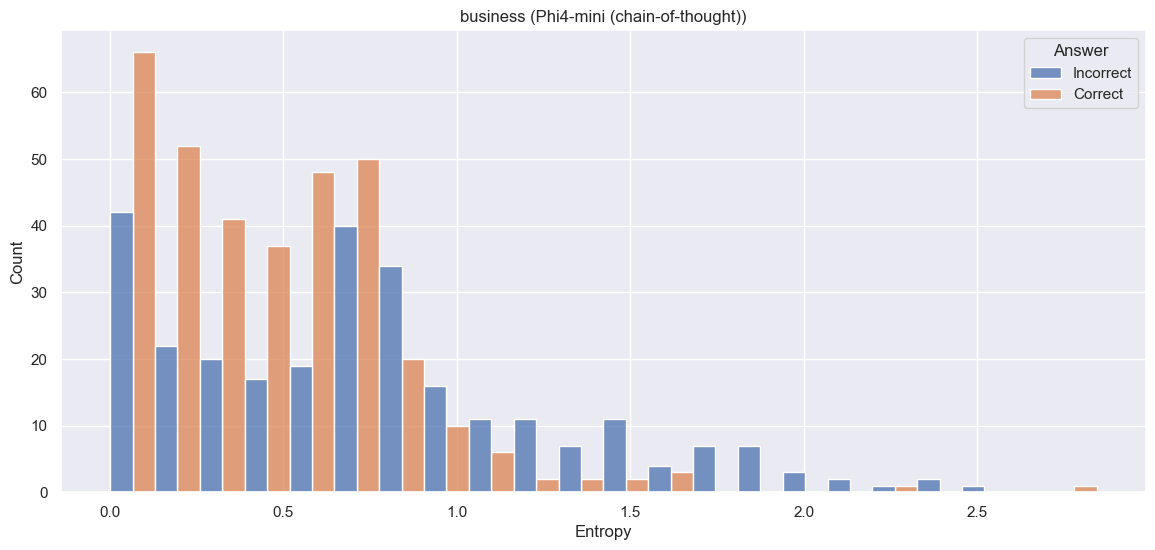

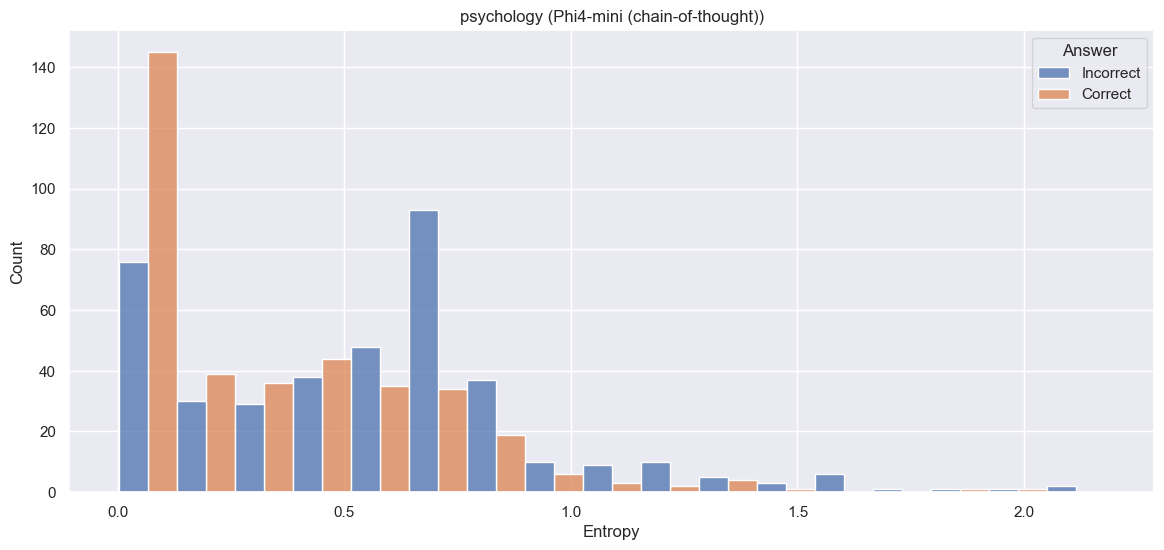

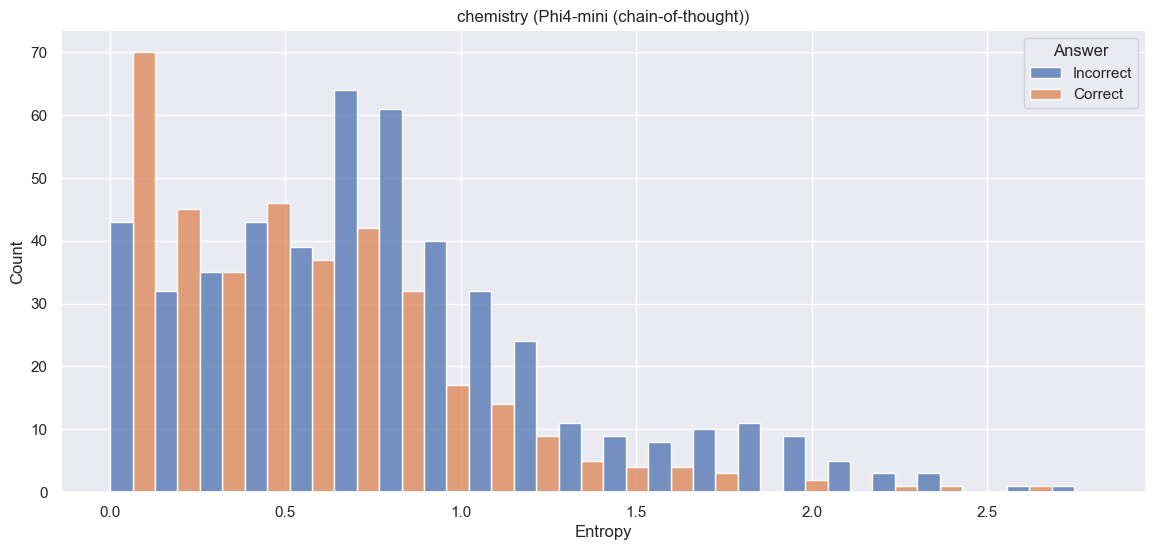

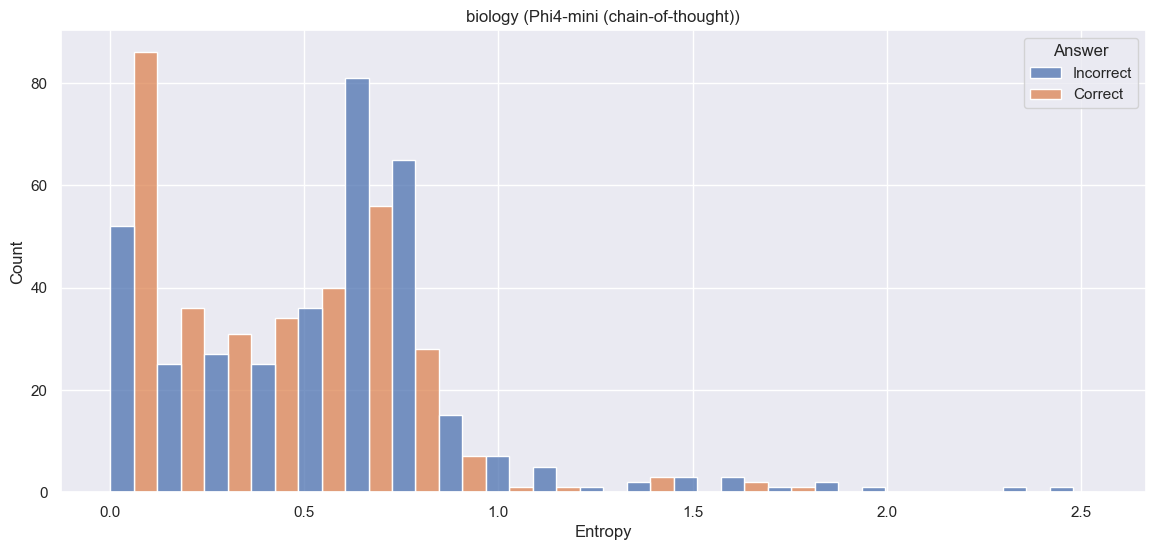

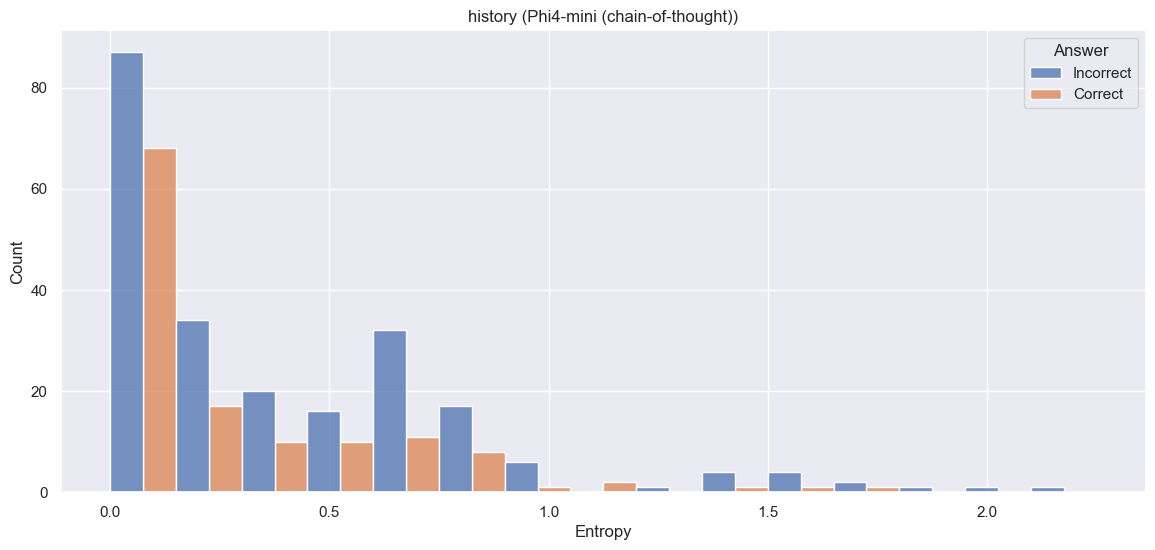

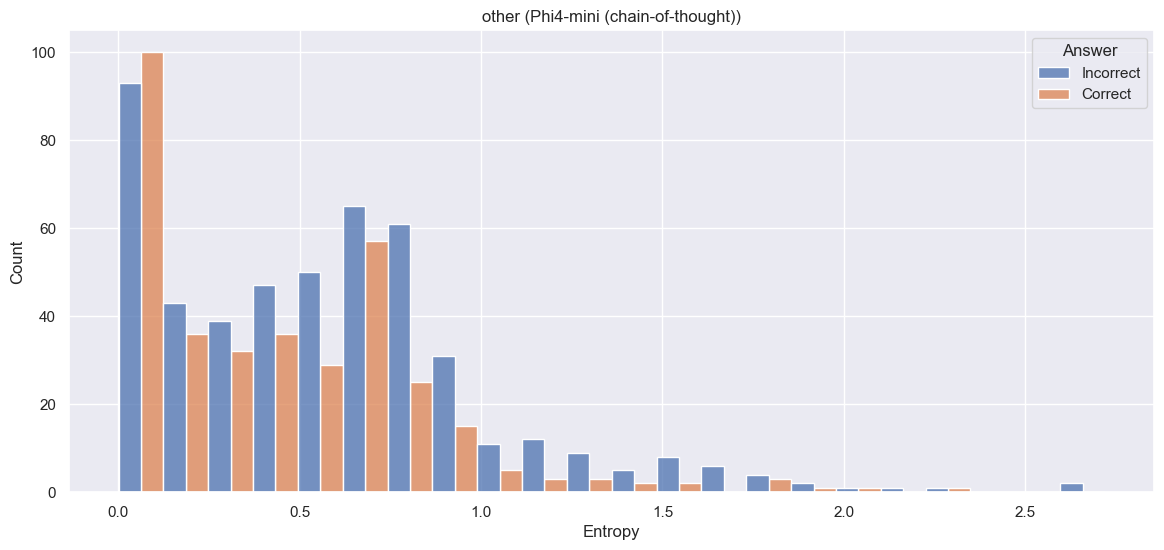

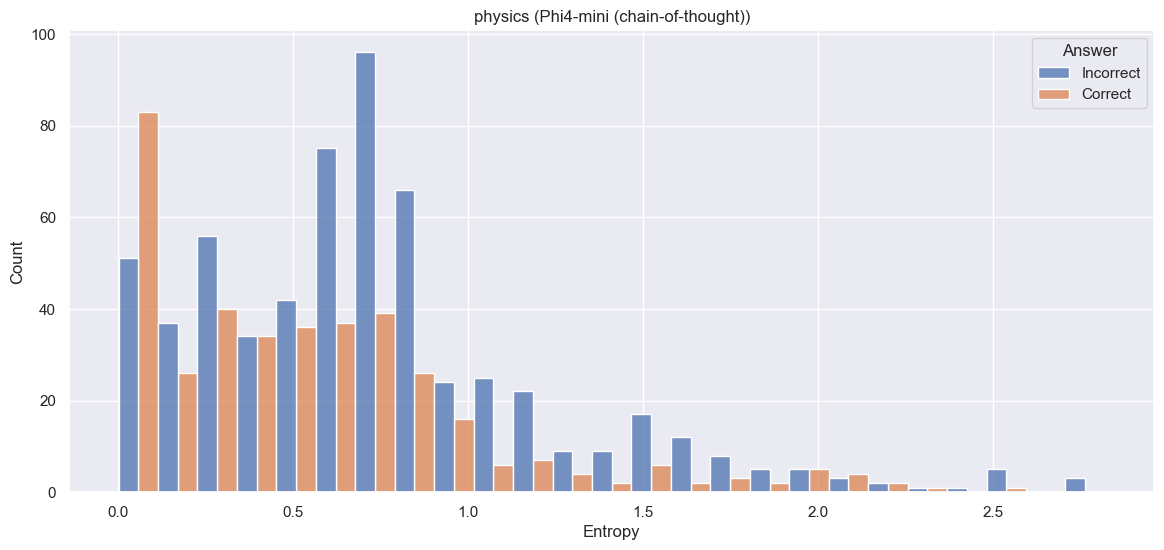

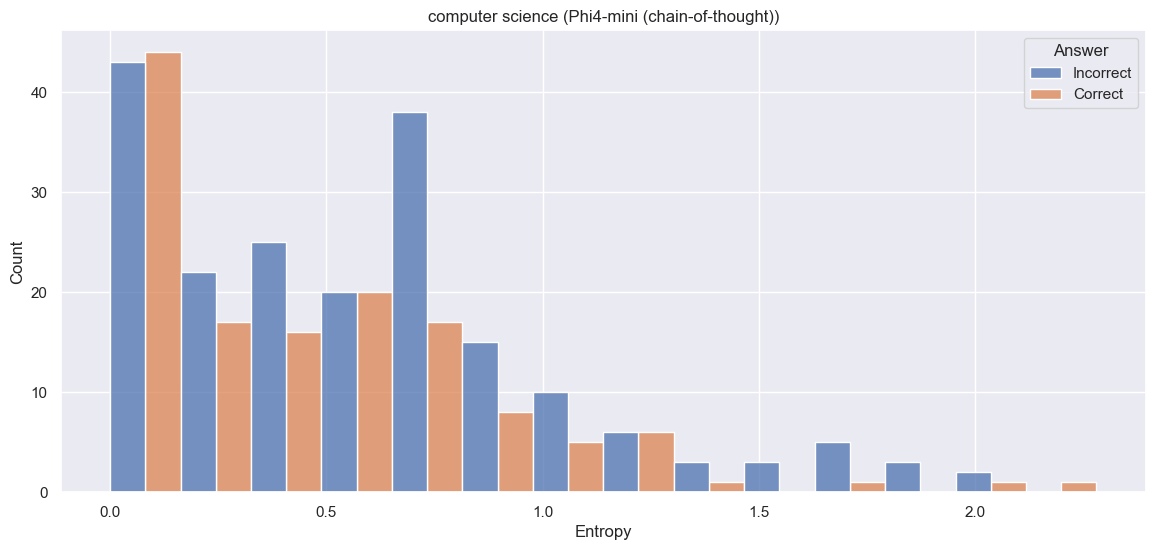

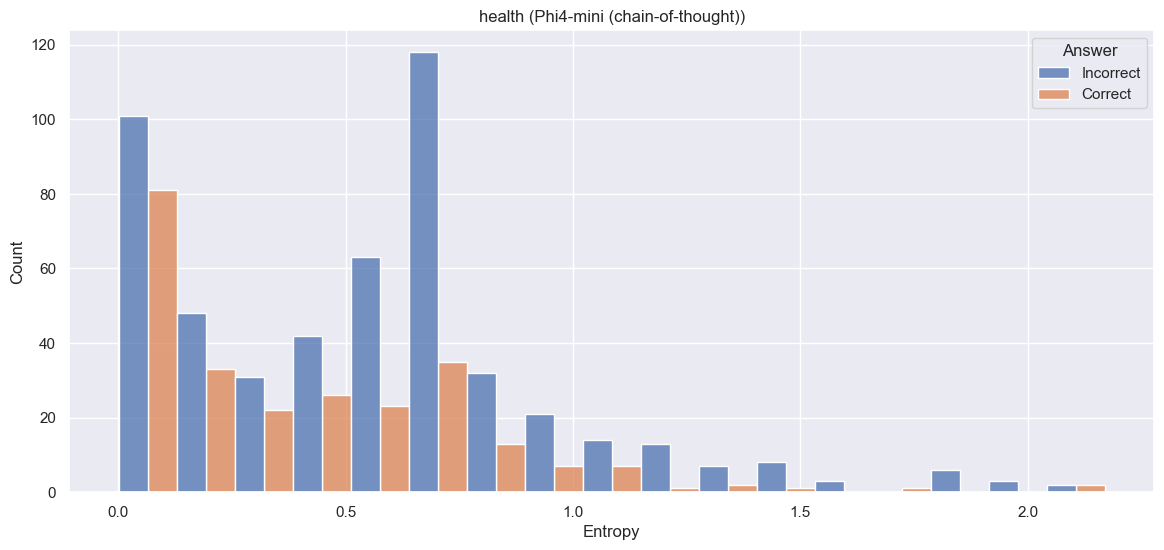

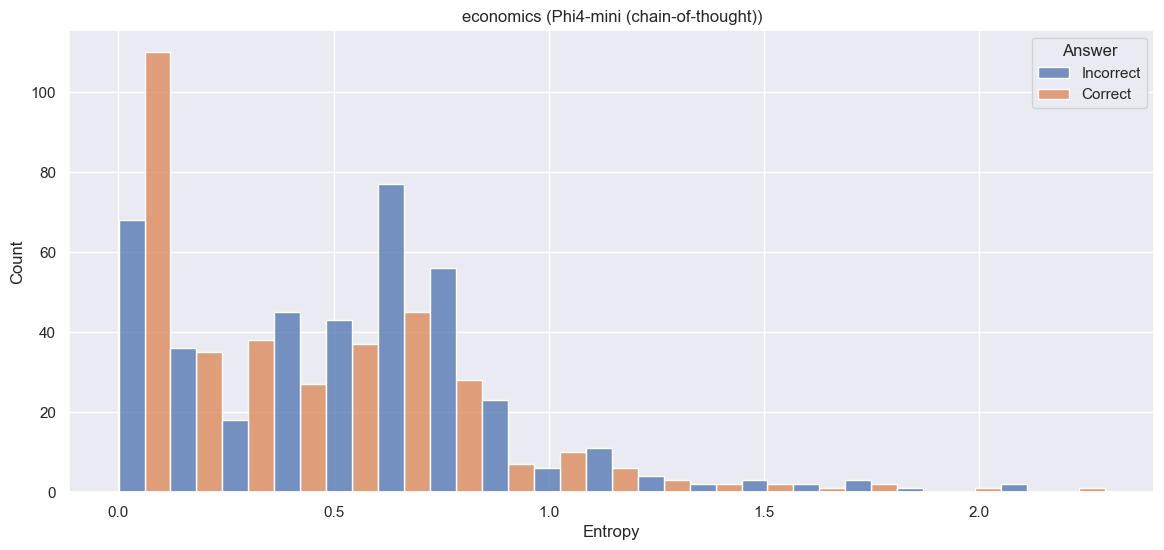

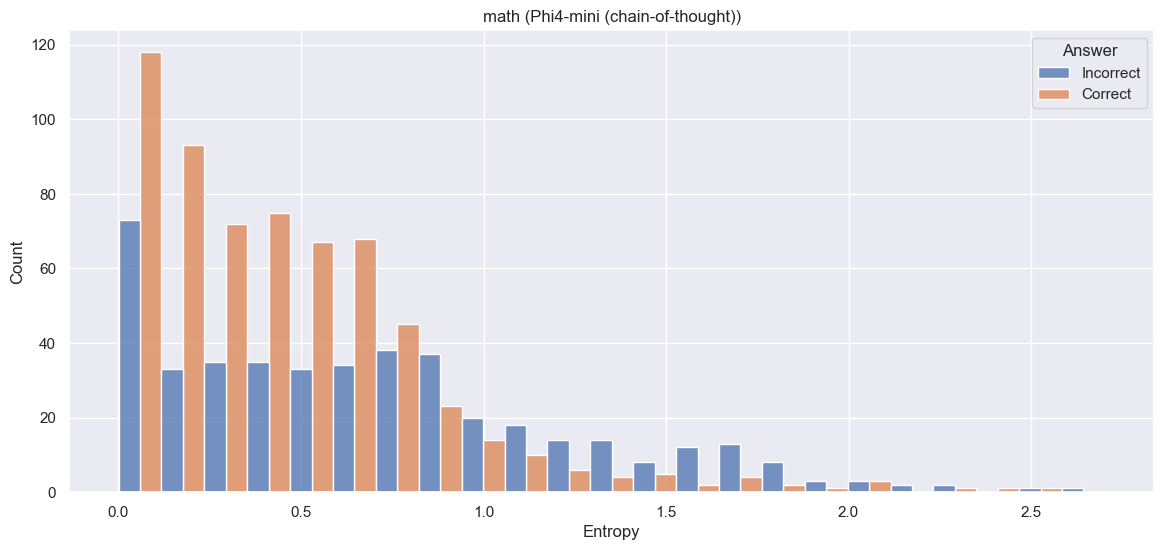

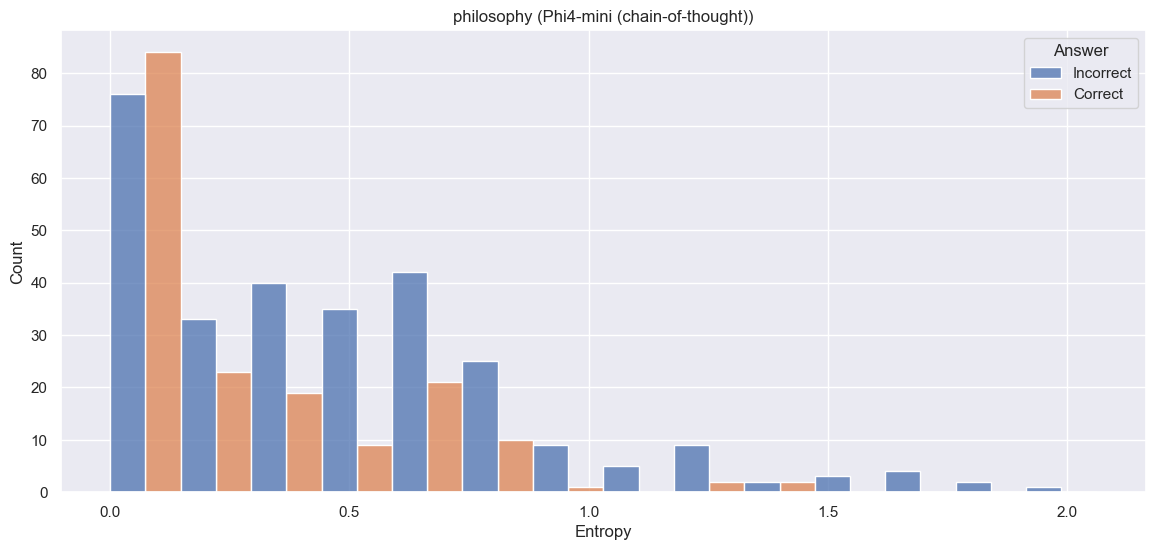

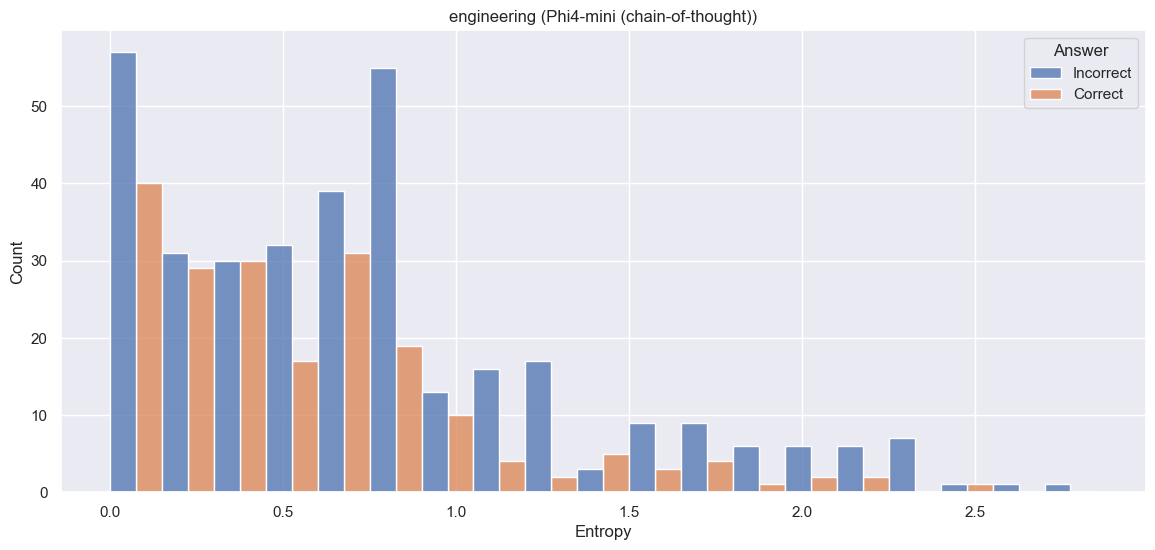

In [9]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_filtered,
    "category",
    "phi3_answer_entropy",
    "phi3_ans_correct",
    model_name="Phi4-mini (chain-of-thought)",
)